# 6.2 - Exploring Relationships

### Contents list:
1. Import libraries and data
2. Exploratory visualizations
    - Correlation matrix heatmap
    - Scatterplots
    - Pair plot
    - Categorical plot
3. Revisit key questions
4. Define hypotheses

### 1. Import libraries and data

In [1]:
# import libraries

import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import matplotlib
import os

In [2]:
# Tell Python to remember a main folder path
path = r'C:\Users\Frederick\Documents\CareerFoundry\CF - Data Analytics Immersion\Achievement6\05-2024 World Happiness Report'

In [3]:
# import 2019 data

df = pd.read_csv(os.path.join(path,'02 Data','Prepared Data','2019_checked.csv'), index_col = False)

### 2.Data Cleaning

#### Renaming Columns

In [4]:
df.shape

(156, 10)

In [5]:
df.columns

Index(['Unnamed: 0', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Healthy life expectancy',
       'Freedom to make life choices', 'Generosity',
       'Perceptions of corruption'],
      dtype='object')

In [6]:
# Rename columns whose names are too long

df.rename(columns = {'Healthy life expectancy' : 'Health', 'Freedom to make life choices': 'Free choice', 
                     'Perceptions of corruption': 'Corruption' },
                      inplace = True)

In [7]:
df.dtypes

Unnamed: 0             int64
Overall rank           int64
Country or region     object
Score                float64
GDP per capita       float64
Social support       float64
Health               float64
Free choice          float64
Generosity           float64
Corruption           float64
dtype: object

In [8]:
df.head()

,Unnamed: 0,Overall rank,Country or region,Score,GDP per capita,Social support,Health,Free choice,Generosity,Corruption
0,0,1,Finland,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,1,2,Denmark,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,2,3,Norway,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,3,4,Iceland,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,4,5,Netherlands,7.488,1.396,1.522,0.999,0.557,0.322,0.298


#### Missing Values Check:

In [9]:
# Check for missing values

df.isnull().sum() # No missing values!

Unnamed: 0           0
Overall rank         0
Country or region    0
Score                0
GDP per capita       0
Social support       0
Health               0
Free choice          0
Generosity           0
Corruption           0
dtype: int64

#### Duplicates Check:

In [10]:
# Find duplicates

df_dups = df[df.duplicated()]

In [11]:
df_dups.shape # No duplicates!

(0, 10)

### 3. Exploring Relationships

### Correlations:

In [12]:
numeric_df = df.select_dtypes(include=[np.number])

In [13]:
print(numeric_df.head())

   Unnamed: 0  Overall rank  Score  GDP per capita  Social support  Health  \
0           0             1  7.769           1.340           1.587   0.986   
1           1             2  7.600           1.383           1.573   0.996   
2           2             3  7.554           1.488           1.582   1.028   
3           3             4  7.494           1.380           1.624   1.026   
4           4             5  7.488           1.396           1.522   0.999   

   Free choice  Generosity  Corruption  
0        0.596       0.153       0.393  
1        0.592       0.252       0.410  
2        0.603       0.271       0.341  
3        0.591       0.354       0.118  
4        0.557       0.322       0.298  


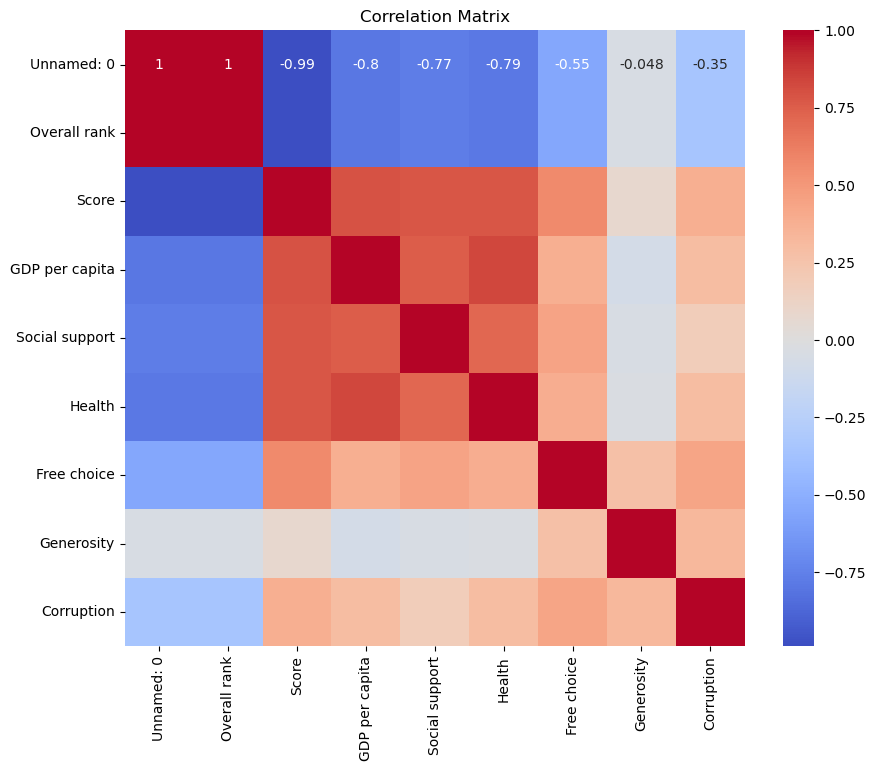

                Unnamed: 0  Overall rank     Score  GDP per capita  \
Unnamed: 0        1.000000      1.000000 -0.989096       -0.801947   
Overall rank      1.000000      1.000000 -0.989096       -0.801947   
Score            -0.989096     -0.989096  1.000000        0.793883   
GDP per capita   -0.801947     -0.801947  0.793883        1.000000   
Social support   -0.767465     -0.767465  0.777058        0.754906   
Health           -0.787411     -0.787411  0.779883        0.835462   
Free choice      -0.546606     -0.546606  0.566742        0.379079   
Generosity       -0.047993     -0.047993  0.075824       -0.079662   
Corruption       -0.351959     -0.351959  0.385613        0.298920   

                Social support    Health  Free choice  Generosity  Corruption  
Unnamed: 0           -0.767465 -0.787411    -0.546606   -0.047993   -0.351959  
Overall rank         -0.767465 -0.787411    -0.546606   -0.047993   -0.351959  
Score                 0.777058  0.779883     0.566742    0.

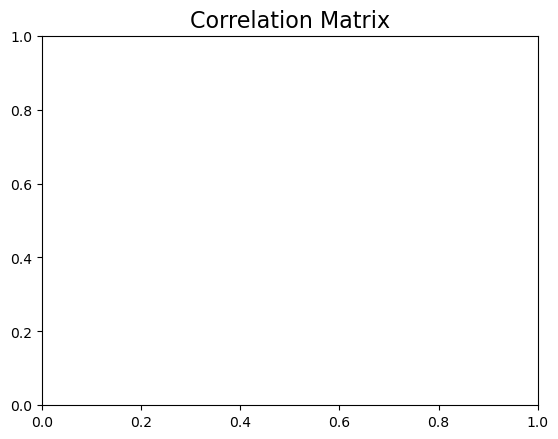

In [15]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
plt.title('Correlation Matrix', fontsize=16) # add title

# Print the correlation matrix to see the values
print(correlation_matrix)

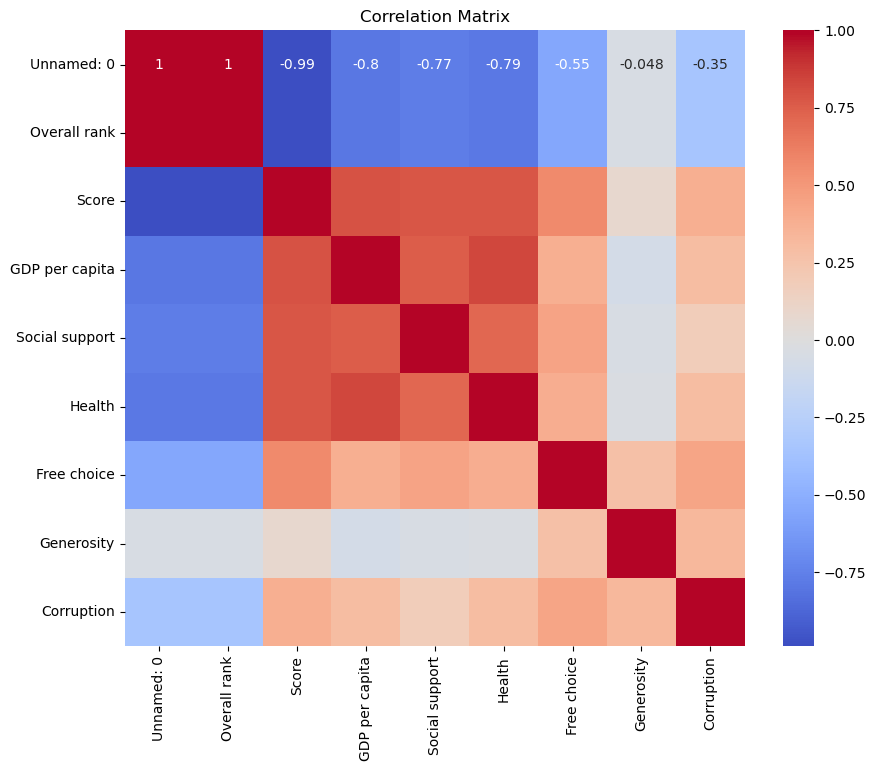

                Unnamed: 0  Overall rank     Score  GDP per capita  \
Unnamed: 0        1.000000      1.000000 -0.989096       -0.801947   
Overall rank      1.000000      1.000000 -0.989096       -0.801947   
Score            -0.989096     -0.989096  1.000000        0.793883   
GDP per capita   -0.801947     -0.801947  0.793883        1.000000   
Social support   -0.767465     -0.767465  0.777058        0.754906   
Health           -0.787411     -0.787411  0.779883        0.835462   
Free choice      -0.546606     -0.546606  0.566742        0.379079   
Generosity       -0.047993     -0.047993  0.075824       -0.079662   
Corruption       -0.351959     -0.351959  0.385613        0.298920   

                Social support    Health  Free choice  Generosity  Corruption  
Unnamed: 0           -0.767465 -0.787411    -0.546606   -0.047993   -0.351959  
Overall rank         -0.767465 -0.787411    -0.546606   -0.047993   -0.351959  
Score                 0.777058  0.779883     0.566742    0.

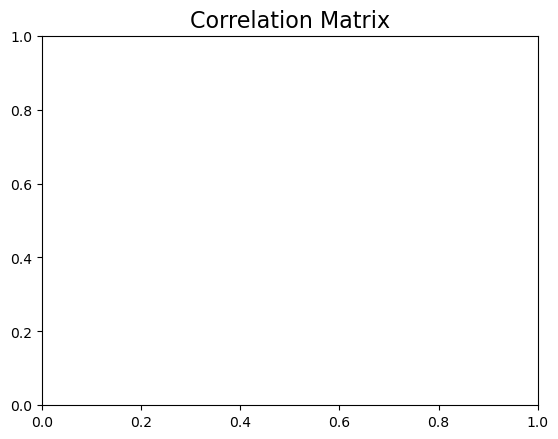

In [20]:
# Compute the correlation matrix
correlation_matrix = numeric_df.corr()

# Visualize the correlation matrix
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', center=0)
plt.title('Correlation Matrix')
plt.show()
plt.title('Correlation Matrix', fontsize=16) # add title

# Print the correlation matrix to see the values
print(correlation_matrix)

#### Create a correlation heatmap using seaborn:

In [136]:
df.columns

Index(['Unnamed: 0', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Health', 'Free choice',
       'Generosity', 'Corruption'],
      dtype='object')

In [137]:
# Create a subset excluding the "Unnamed" and "Overrall rank" columns

sub = df[[ 'Score',
       'GDP per capita', 'Social support', 'Health', 'Free choice',
       'Generosity', 'Corruption']]

In [138]:
sub

,Score,GDP per capita,Social support,Health,Free choice,Generosity,Corruption
0,7.769,1.340,1.587,0.986,0.596,0.153,0.393
1,7.600,1.383,1.573,0.996,0.592,0.252,0.410
2,7.554,1.488,1.582,1.028,0.603,0.271,0.341
3,7.494,1.380,1.624,1.026,0.591,0.354,0.118
4,7.488,1.396,1.522,0.999,0.557,0.322,0.298
...,...,...,...,...,...,...,...
151,3.334,0.359,0.711,0.614,0.555,0.217,0.411
152,3.231,0.476,0.885,0.499,0.417,0.276,0.147
153,3.203,0.350,0.517,0.361,0.000,0.158,0.025
154,3.083,0.026,0.000,0.105,0.225,0.235,0.035


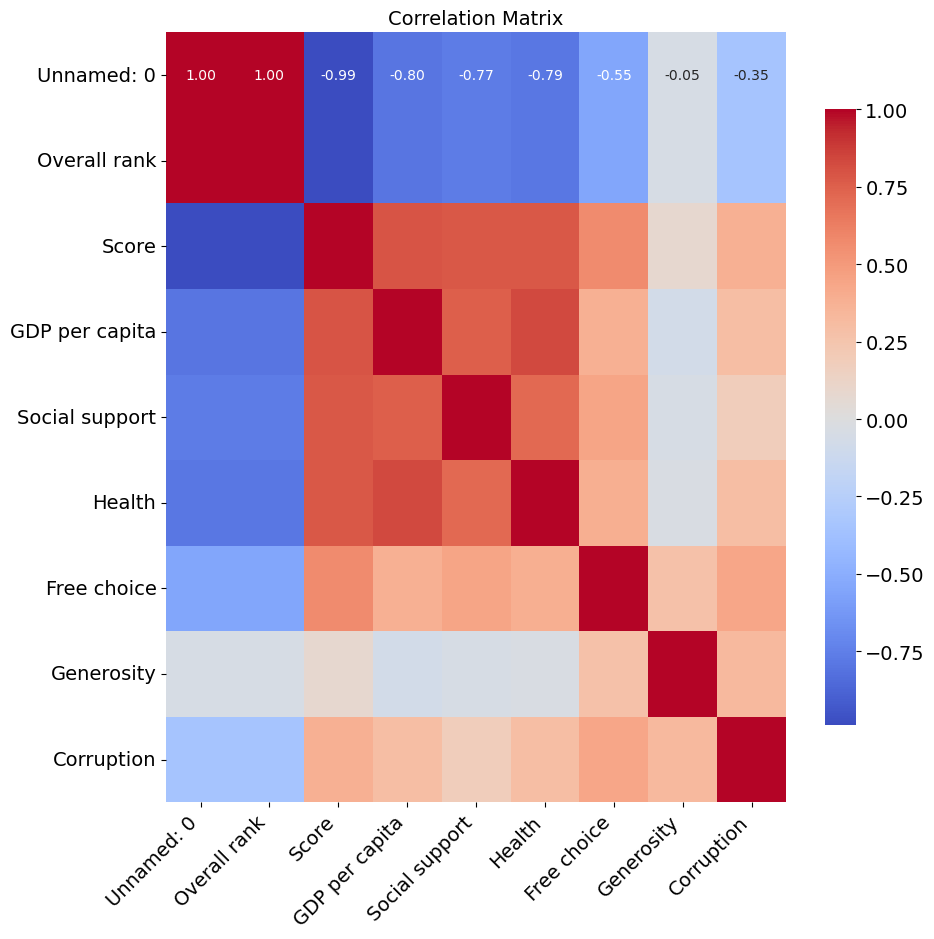

In [24]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd

# Assuming df is your DataFrame
# df = pd.read_csv('your_data.csv')  # Uncomment and adjust if needed

# Select only numeric columns for the correlation matrix
numeric_df = df.select_dtypes(include=[float, int])

# Create a subplot with matplotlib
fig, ax = plt.subplots(figsize=(10,10))

# Create the correlation heatmap in seaborn by applying a heatmap onto the correlation matrix and the subplots defined above.
sns.heatmap(numeric_df.corr(), annot=True, fmt=".2f", cmap='coolwarm', ax=ax, cbar_kws={'shrink': 0.8})

# Adjusting x and y axis labels
plt.xticks(rotation=45, ha='right', fontsize=14)
plt.yticks(fontsize=14)

# Title and colorbar adjustments
ax.set_title('Correlation Matrix', fontsize=14)
cb = ax.collections[0].colorbar
cb.ax.tick_params(labelsize=14)

plt.show()


We see in this heatmap that the GDP per country also has an impact on happyness, because the higher the GDP, the higher the support system and the better ones health is also. 

### Scatterplots:

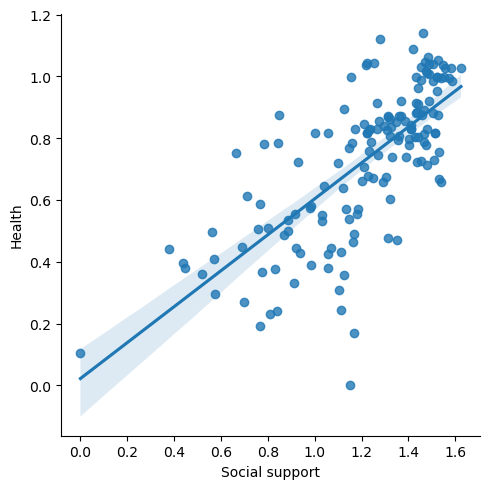

In [140]:
# Create a scatterplot for the "house age" and "price per unit" columns in seaborn

sns.lmplot(x = 'Social support', y = 'Health', data = df)

We can see a high correlation between Social support and Health, if we have a bigger social support is also better for our health. 

### Pair Plots:

In [141]:
# Keep only the variables you want to use in the pair plot

sub_2 = sub[['Score',
       'GDP per capita', 'Social support', 'Health', 'Free choice',
       'Generosity', 'Corruption']]

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):
C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN 

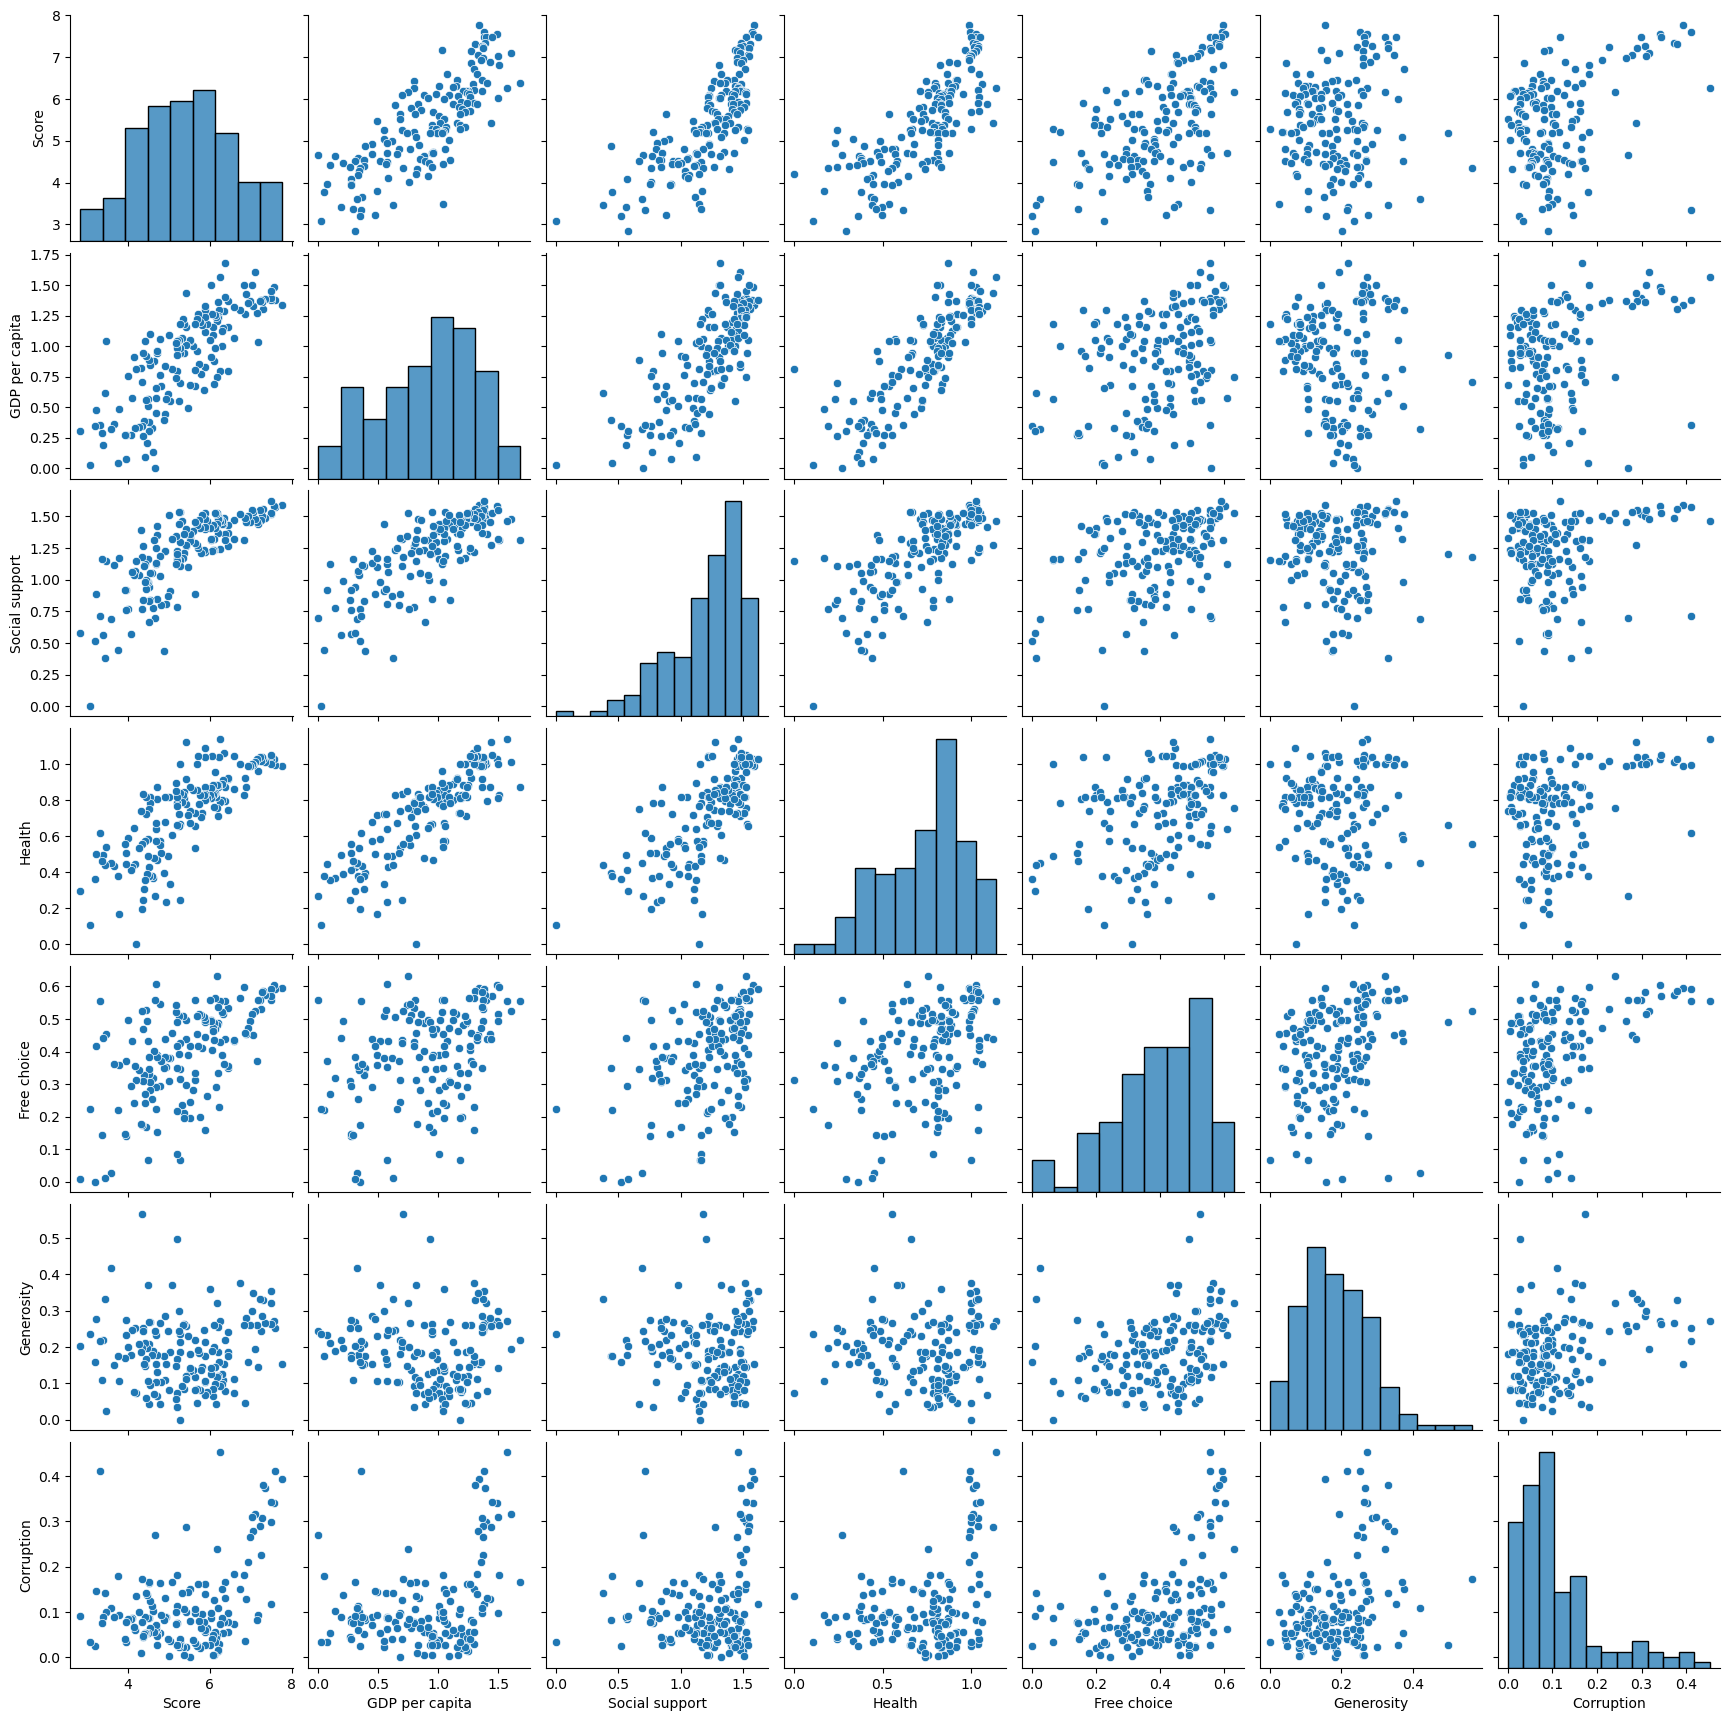

In [142]:
# Create a pair plot 

g = sns.pairplot(sub_2)

#### Discussion
The scatterplots take on a wide variety of clusters which makes me realize how inadequate a simple correlation coefficient is at helping iluminate the relationships between these variables. I'm very interested in the relationship between Health and multiple variables including corruption because there seems to be multiple distinct trends happening. Do these trends differ across certain countries? I'm also interested in Social support vs Health and corruption. 

### Categorical Plots:

##### Creating a categorical variable that splits the "Health" column into categories

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Corruption', ylabel='Count'>

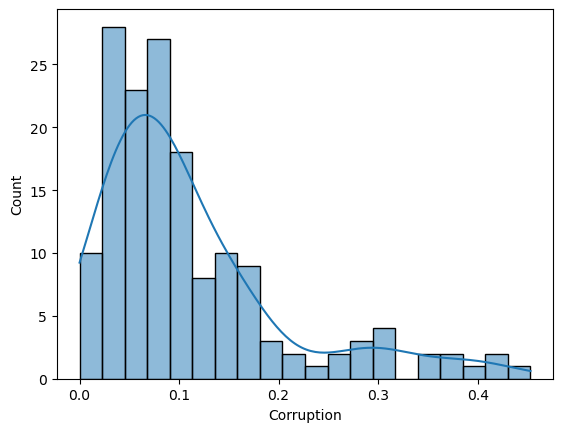

In [143]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Corruption'], bins = 20, kde = True)

In [149]:
df.loc[df['Corruption'] < 0.1, 'Corruption_Status'] = 'High'

In [145]:
df.loc[(df['Corruption'] > 0.1) & (df['Corruption'] < 0.2),'Corruption_Status'] = 'Medium'

In [148]:
df.loc[df['Corruption'] > 0.2, 'Corruption_Status'] = 'Low'

In [150]:
df['Corruption_Status'].value_counts(dropna = False)

Corruption_Status
High      96
Medium    37
Low       20
nan        3
Name: count, dtype: int64

In [151]:
df.columns

Index(['Unnamed: 0', 'Overall rank', 'Country or region', 'Score',
       'GDP per capita', 'Social support', 'Health', 'Free choice',
       'Generosity', 'Corruption', 'Corruption_Status'],
      dtype='object')

C:\Users\Frederick\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


<Axes: xlabel='Social support', ylabel='Count'>

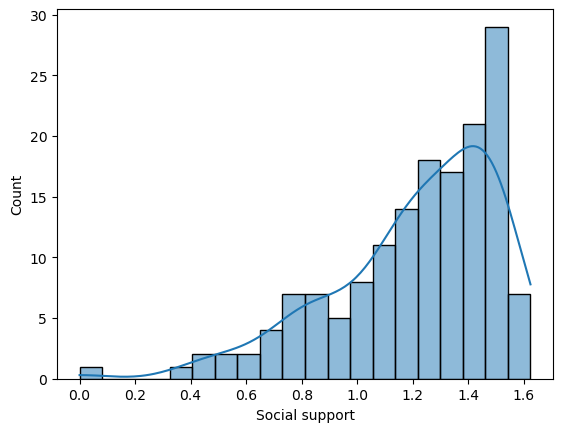

In [152]:
# Use a histogram to visualize the distribution of the variables. 
# This way, you can determine sensible categories for the price ranges. 
# You don't want to end up with too few observations in any one of the categories.
# The argument "kde" add a line that encompasses the distribution

sns.histplot(df['Social support'], bins = 20, kde = True)

In [159]:
df.loc[df['Social support'] < 0.7, 'Support_Status'] = 'High Support'

In [160]:
df.loc[(df['Social support'] >= 0.7) & (df['Social support'] < 1.2),'Support_Status'] = 'Medium Support'

In [161]:
df.loc[df['Social support'] > 1.2, 'Support_Status'] = 'Low Support'

In [162]:
# Print the DataFrame to verify the new columns
print(df[['Country or region', 'Social support', 'Support_Status', 'Corruption', 'Corruption_Status']])


            Country or region  Social support  Support_Status  Corruption  \
0                     Finland           1.587     Low Support       0.393   
1                     Denmark           1.573     Low Support       0.410   
2                      Norway           1.582     Low Support       0.341   
3                     Iceland           1.624     Low Support       0.118   
4                 Netherlands           1.522     Low Support       0.298   
..                        ...             ...             ...         ...   
151                    Rwanda           0.711  Medium Support       0.411   
152                  Tanzania           0.885  Medium Support       0.147   
153               Afghanistan           0.517    High Support       0.025   
154  Central African Republic           0.000    High Support       0.035   
155               South Sudan           0.575    High Support       0.091   

    Corruption_Status  
0                 Low  
1                 Low  
2  

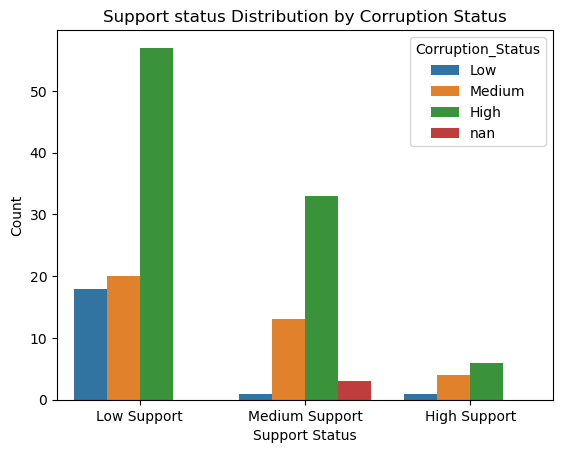

In [163]:
# Plot the categorical data with hue
sns.countplot(x='Support_Status', hue='Corruption_Status', data=df)
plt.title('Support status Distribution by Corruption Status')
plt.xlabel('Support Status')
plt.ylabel('Count')
plt.show()

Statement that I want to look into further =  the bigger the corruption the lower the social support system is per country and vice versa. 